In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns

In [2]:
warnings.filterwarnings('ignore')

In [3]:
all_files = glob.glob(r"./roubos/*")
df = pd.concat((pd.read_csv(f, sep='\t', encoding='UTF-16 LE') for f in all_files), ignore_index=True)

In [4]:
df.to_csv('roubos_consolidado.csv', index=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113626 entries, 0 to 113625
Data columns (total 54 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ANO_BO                    113626 non-null  int64  
 1   NUM_BO                    113626 non-null  int64  
 2   NUMERO_BOLETIM            113626 non-null  object 
 3   BO_INICIADO               113626 non-null  object 
 4   BO_EMITIDO                113626 non-null  object 
 5   DATAOCORRENCIA            113626 non-null  object 
 6   HORAOCORRENCIA            109630 non-null  object 
 7   PERIDOOCORRENCIA          113626 non-null  object 
 8   DATACOMUNICACAO           113626 non-null  object 
 9   DATAELABORACAO            113626 non-null  object 
 10  BO_AUTORIA                113626 non-null  object 
 11  FLAGRANTE                 113626 non-null  object 
 12  NUMERO_BOLETIM_PRINCIPAL  17242 non-null   object 
 13  LOGRADOURO                107999 non-null  o

In [6]:
df.columns = df.columns.str.lower()

In [7]:
df['dataocorrencia'].str.slice(6, 10).unique()

array(['2020', '2021', '2010', '2012', '2019', '2018', '2016', '2017',
       '2014', '2015', '1995', '1983', '1990', '2005', '1984', '2011',
       '2002', '2001', '1991', '1980', '1977', '0201', '1202', '2006',
       '1981', '2003', '2000', '1985', '1964', '2009', '2008', '2007',
       '1975', '1989', '2022', '1974'], dtype=object)

In [8]:
df[pd.to_datetime(df['dataocorrencia'], errors='coerce').isnull()]

,ano_bo,num_bo,numero_boletim,bo_iniciado,bo_emitido,dataocorrencia,horaocorrencia,peridoocorrencia,datacomunicacao,dataelaboracao,...,placa_veiculo,uf_veiculo,cidade_veiculo,descr_cor_veiculo,descr_marca_veiculo,ano_fabricacao,ano_modelo,descr_tipo_veiculo,quant_celular,marca_celular
23050,2021,2368357,2368357/2021,10/12/2021 00:50:27,10/12/2021 00:50:27,09/12/0201,22:50,A NOITE,10/12/2021,10/12/2021 00:50:27,...,QUB5A25,SP,GUARULHOS,Preta,PEUGEOT/208 ACTIVE MT,2019.0,NaN,AUTOMOVEL,NaN,NaN
23617,2021,2382994,2382994/2021,12/12/2021 07:34:02,12/12/2021 07:34:41,28/11/1202,05:34,DE MADRUGADA,12/12/2021,12/12/2021 07:34:02,...,DNH1236,SP,VALINHOS,Verde,HONDA/CG 150 TITAN KS,2004.0,NaN,MOTOCICLO,NaN,NaN
66264,2021,1493085,1493085/2021,16/08/2021 09:26:29,16/08/2021 09:26:52,30/07/1202,07:00,PELA MANHÃ,16/08/2021,16/08/2021 09:26:29,...,FSL8H18,SP,GUARULHOS,Prata,HONDA/XRE 300 ABS,2021.0,NaN,MOTOCICLO,NaN,NaN
66270,2021,1493823,1493823/2021,16/08/2021 10:33:48,16/08/2021 10:31:58,30/07/1202,07:00,PELA MANHÃ,16/08/2021,16/08/2021 10:33:48,...,FSL8H18,SP,GUARULHOS,Prata,HONDA/XRE 300 ABS,2021.0,NaN,MOTOCICLO,NaN,NaN
72977,2021,1744567,1744567/2021,19/09/2021 01:44:47,19/09/2021 01:44:54,04/09/1202,22:00,A NOITE,19/09/2021,19/09/2021 01:44:47,...,CSZ8286,SP,SÃO PAULO,Branco,FORD/KA SE 1.0 HA C,2019.0,NaN,AUTOMOVEL,NaN,NaN


In [9]:
df['data_hora'] = pd.to_datetime(df['dataocorrencia']+' '+df['horaocorrencia'], errors='coerce')

In [10]:
df['cidade'].nunique()

393

In [11]:
df['bairro'].unique()

array(['JARDIM SAO PAULO', 'ITAIM PAULISTA', 'PENHA', ..., 'Vila Jussara',
       'PQ NAUTICO', 'VILA BAZU'], dtype=object)

In [12]:
df['cidade'] = df['cidade'].str.upper()

In [13]:
df['bairro'] = df['bairro'].str.upper()

In [14]:
df['ano'] = df['data_hora'].dt.year
df['mes'] = df['data_hora'].dt.month
df['dia'] = df['data_hora'].dt.day

<AxesSubplot:>

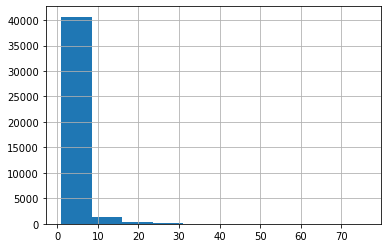

In [15]:
df.groupby(['cidade', 'bairro', 'ano', 'mes', 'dia']).size().hist()

<AxesSubplot:>

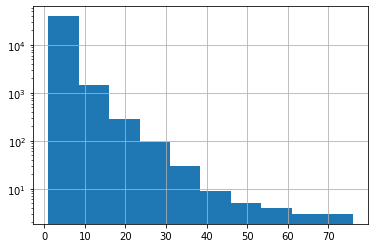

In [16]:
df.groupby(['cidade', 'bairro', 'mes', 'dia']).size().hist(log=True)

<AxesSubplot:>

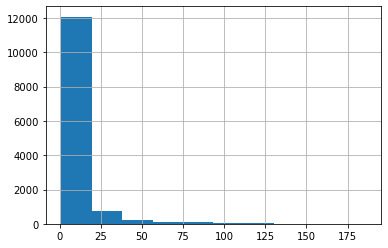

In [17]:
df.groupby(['cidade', 'mes', 'dia']).size().hist()

<AxesSubplot:xlabel='ano,mes,dia'>

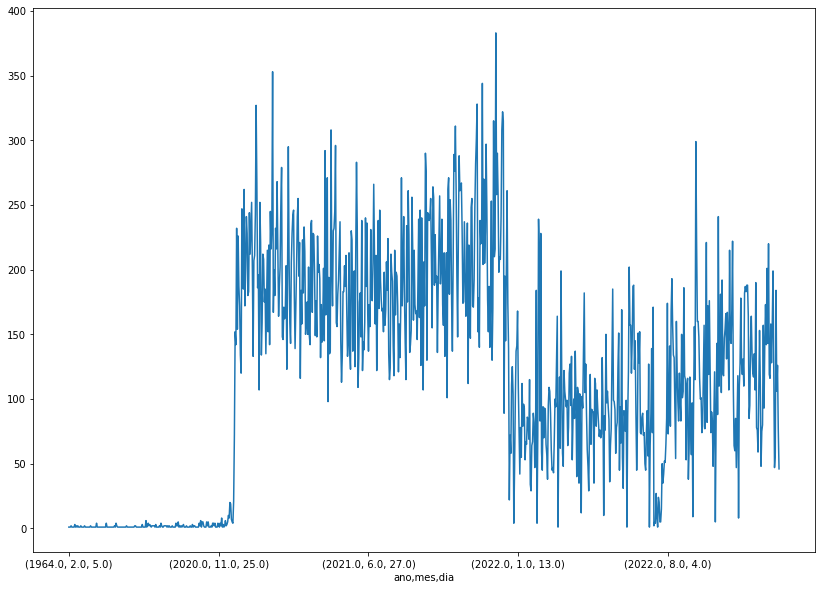

In [18]:
df.groupby(['ano', 'mes', 'dia']).size().plot(figsize=(14, 10))

<AxesSubplot:title={'center':'2022'}, xlabel='ano,mes,dia'>

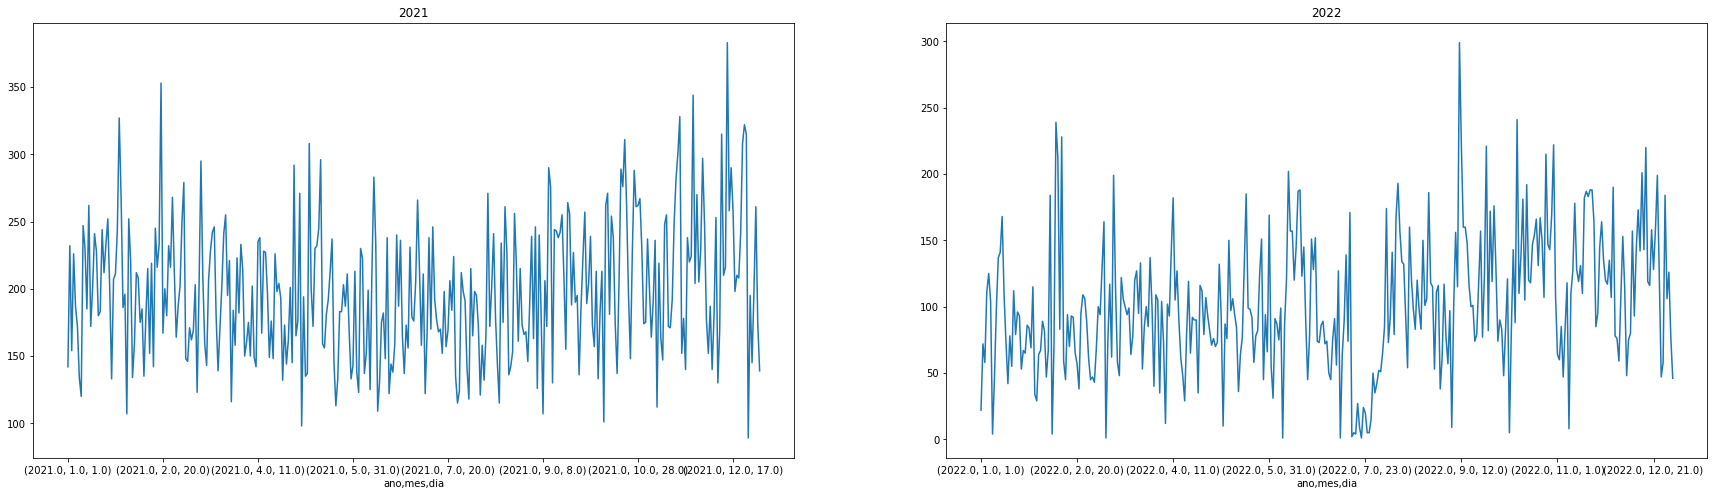

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(30, 8))
ax[0].set_title(2021)
df[df['ano'] == 2021].groupby(['ano', 'mes', 'dia']).size().plot(ax=ax[0])

ax[1].set_title(2022)
df[df['ano'] == 2022].groupby(['ano', 'mes', 'dia']).size().plot(ax=ax[1])

In [20]:
roubos_dia = df[df['ano'].isin([2021, 2022])].groupby(pd.Grouper(key='data_hora', freq='D')).size()

In [21]:
import statsmodels.api as sm

In [22]:
decompose = sm.tsa.seasonal_decompose(roubos_dia, model='additive', period=30)

<Figure size 1440x720 with 0 Axes>

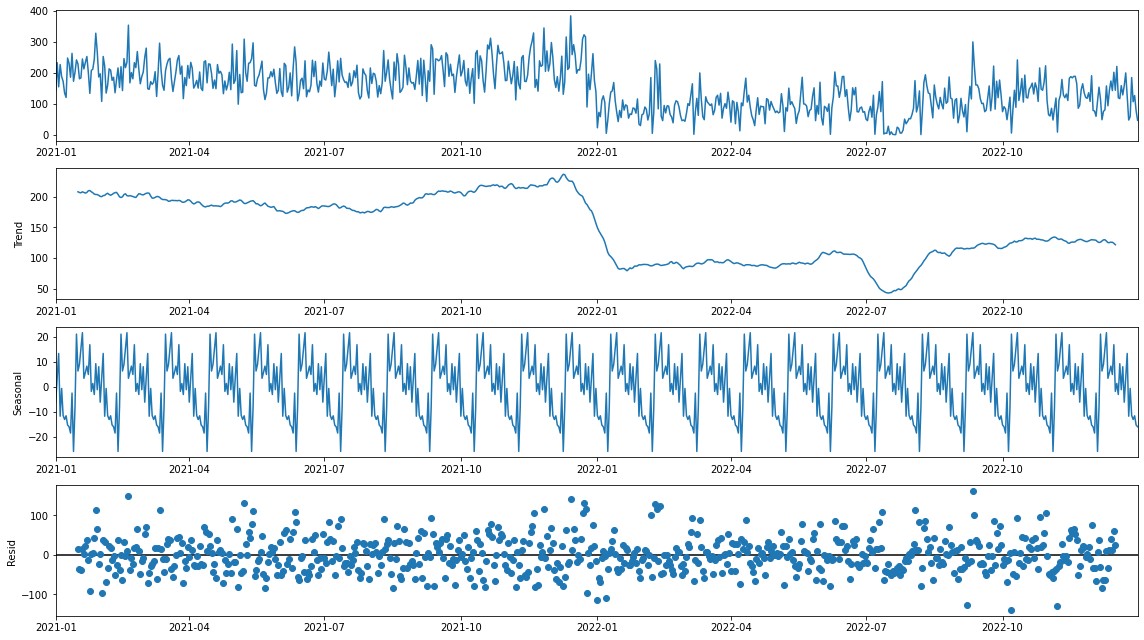

In [23]:
plt.figure(figsize=(20, 10))
fig = decompose.plot()
fig.set_size_inches((16, 9))
plt.tight_layout()

In [24]:
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf

In [25]:
adf = adfuller(roubos_dia)
kps = kpss(roubos_dia)

C:\Users\Rodrigo\miniconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [26]:
print("ADF")
print(f"Statistics {adf[0]}")
print(f"p-value {adf[1]}")
print()
print("KPSS")
print(f"Statistics {kps[0]}")
print(f"p-value {kps[1]}")

ADF
Statistics -2.4981951935357283
p-value 0.11591407145840477

KPSS
Statistics 2.4945989238061097
p-value 0.01


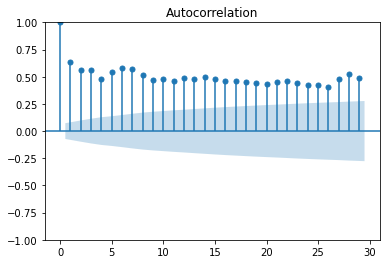

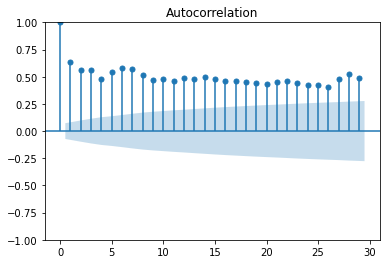

In [27]:
plot_acf(roubos_dia)

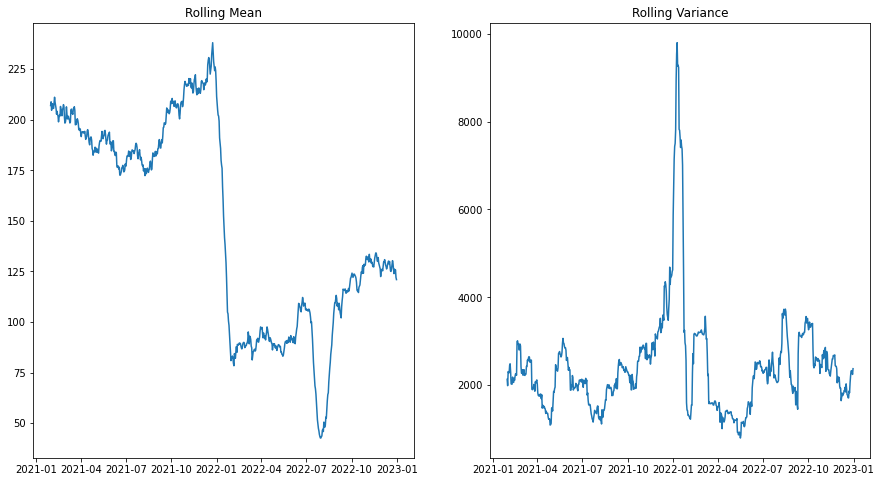

In [34]:
rolling_mean = roubos_dia.rolling(window=30).mean()
rolling_var = roubos_dia.rolling(window=30).var()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
ax1.set_title("Rolling Mean")
ax1.plot(rolling_mean)
ax2.set_title("Rolling Variance")
ax2.plot(rolling_var)

In [35]:
from sklearn import tree

In [166]:
X, y = roubos_dia.index, roubos_dia.values

In [167]:
estacao = (X.month - 1) // 3

In [168]:
X = np.array([
    X.year, X.month, X.day, X.weekday, estacao
])

In [169]:
X = X.T

In [60]:
regressor = tree.DecisionTreeRegressor(max_depth=3, min_samples_leaf=50)

In [68]:
regressor.fit(X, y)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=50)

In [69]:
y_pred = regressor.predict(X)

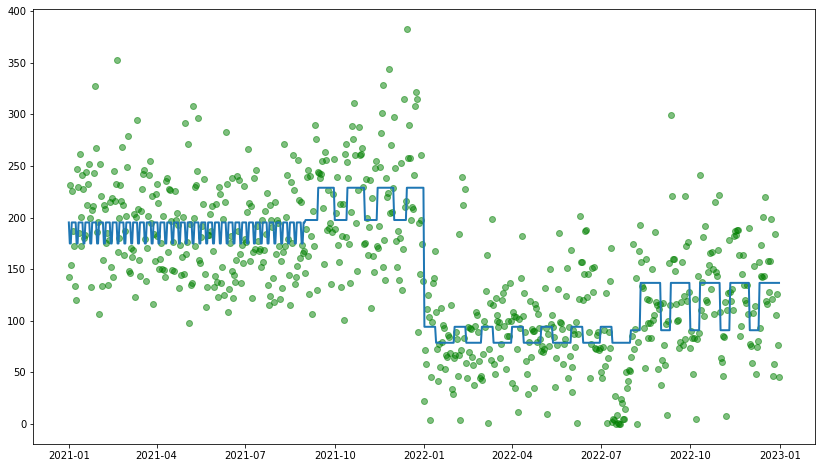

In [79]:
plt.figure(figsize=(14, 8))
plt.scatter(roubos_dia.index, roubos_dia, alpha=.5, c='g')
plt.plot(roubos_dia.index, y_pred, linewidth=2)

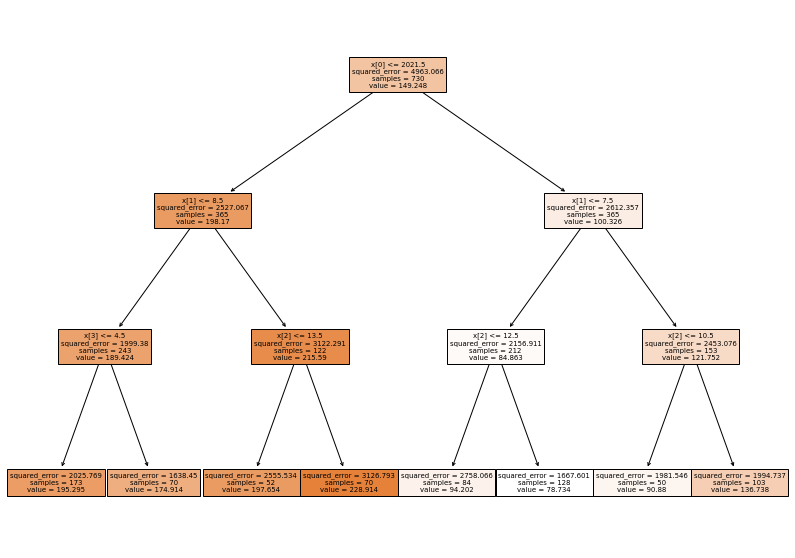

In [182]:
plt.figure(figsize=(14, 10))
tree.plot_tree(regressor, filled=True)
plt.show()

In [187]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [173]:
arima = ARIMA(y, order=(2, 2, 1))

In [174]:
arima_result = arima.fit()

In [164]:
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   66
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 282.003
Date:                Sun, 16 Apr 2023   AIC                           -556.005
Time:                        16:22:46   BIC                           -547.308
Sample:                             0   HQIC                          -552.574
                                 - 66                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0232      4.195      0.006      0.996      -8.198       8.245
ar.L2          0.9763      4.192      0.233      0.816      -7.240       9.192
ma.L1          0.9452      7.294      0.130      0.897     -13.352      15.242
sigma2      1.077e-05   4.67e-06      2.304      0.021    1.61e-06    1.99e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10426.88
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                             7.87
Prob(H) (two-sided):                  0.00   Kurtosis:                        63.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

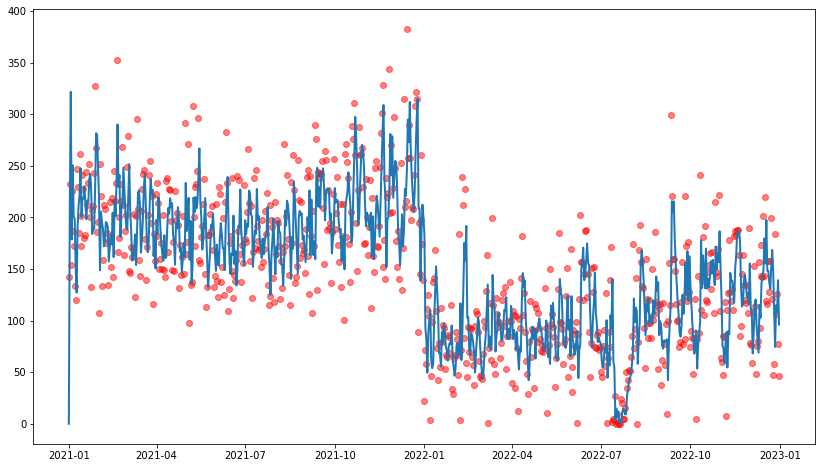

In [175]:
plt.figure(figsize=(14, 8))
plt.scatter(roubos_dia.index, roubos_dia, alpha=.5, c='r')
plt.plot(roubos_dia.index, arima_result.fittedvalues, linewidth=2)

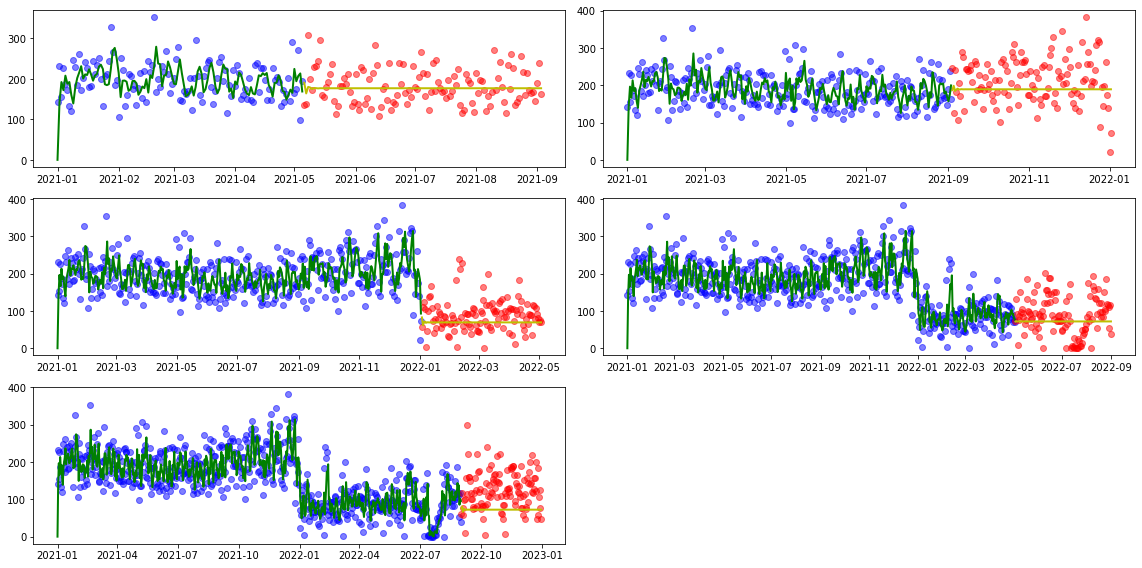

In [234]:
mse = []
mae = []
plt.figure(figsize=(16, 8))
spliter = TimeSeriesSplit(n_splits=5)
for i, (train_i, test_i) in enumerate(spliter.split(roubos_dia)):
    plt.subplot(3, 2, i+1)
    y_train = roubos_dia.iloc[train_i]
    y_test = roubos_dia.iloc[test_i]
    arima = ARIMA(y_train, order=(2,1,0))
    result = arima.fit()
    fitted = result.fittedvalues
    #y_pred = result.predict(start=y_test.index[0], end=y_test.index[-1], dynamic=True)
    y_pred = result.forecast(steps=len(y_test))
    mse.append(mean_squared_error(y_test, y_pred))
    mae.append(mean_absolute_error(y_test, y_pred))
    
    plt.scatter(y_train.index, y_train, c='b', alpha=.5)
    plt.plot(y_train.index, fitted, c='g', linewidth=2)

    plt.scatter(y_test.index, y_test, c='r', alpha=.5)
    plt.plot(y_test.index, y_pred, c='y', linewidth=2)
plt.tight_layout()

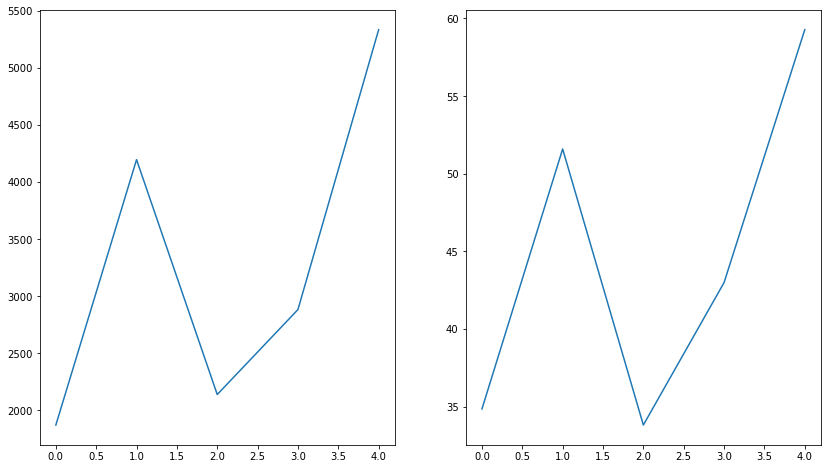

In [235]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))
ax1.plot(mse)
ax2.plot(mae)

In [232]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

C:\Users\Rodrigo\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


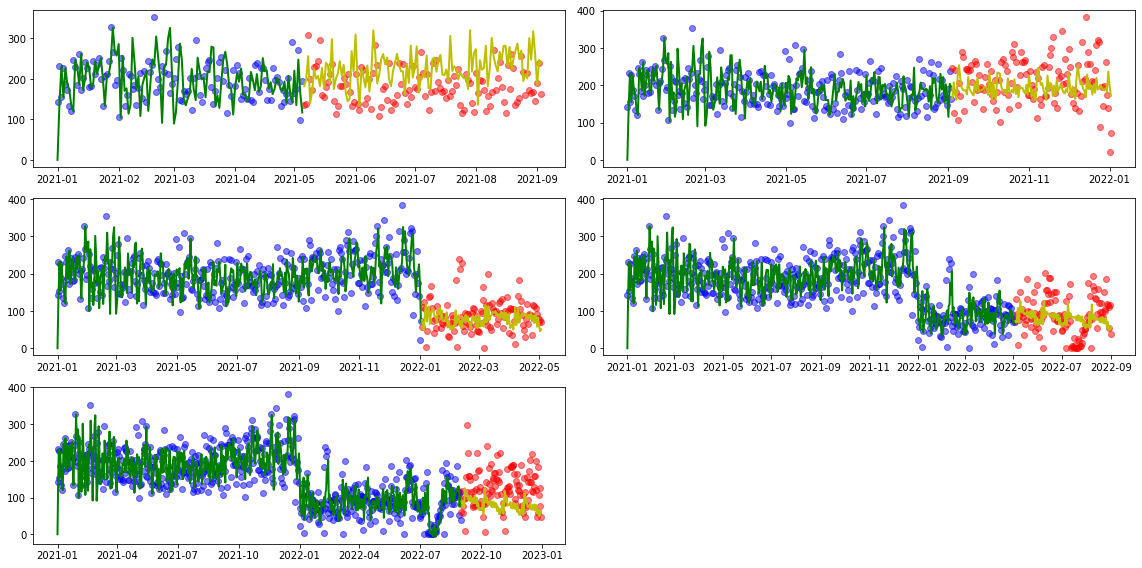

In [243]:
mse = []
mae = []
plt.figure(figsize=(16, 8))
spliter = TimeSeriesSplit(n_splits=5)
for i, (train_i, test_i) in enumerate(spliter.split(roubos_dia)):
    plt.subplot(3, 2, i+1)
    y_train = roubos_dia.iloc[train_i]
    y_test = roubos_dia.iloc[test_i]
    arima = SARIMAX(y_train, order=(2,1,0), seasonal_order=(2, 1, 1, 30))
    result = arima.fit()
    fitted = result.fittedvalues
    #y_pred = result.predict(start=y_test.index[0], end=y_test.index[-1], dynamic=True)
    y_pred = result.forecast(steps=len(y_test))
    mse.append(mean_squared_error(y_test, y_pred))
    mae.append(mean_absolute_error(y_test, y_pred))
    
    plt.scatter(y_train.index, y_train, c='b', alpha=.5)
    plt.plot(y_train.index, fitted, c='g', linewidth=2)

    plt.scatter(y_test.index, y_test, c='r', alpha=.5)
    plt.plot(y_test.index, y_pred, c='y', linewidth=2)
plt.tight_layout()

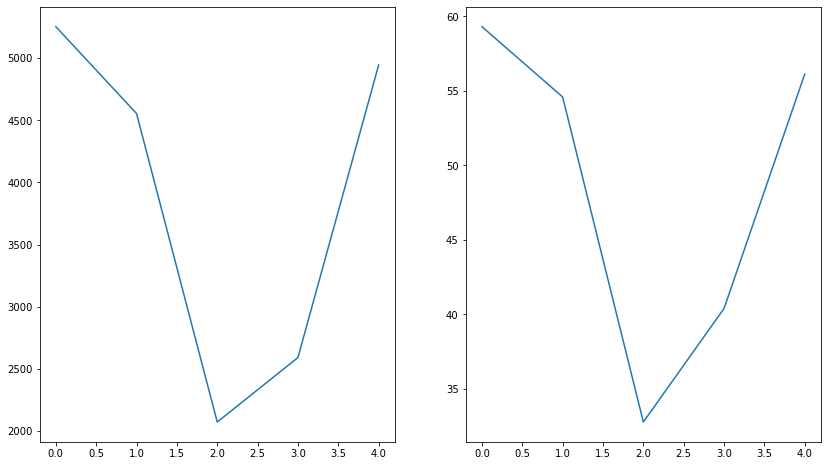

In [244]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))
ax1.plot(mse)
ax2.plot(mae)